In [23]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import Transformation
import DataCleaning
import ErrorVis
import numpy as np
import statsmodels.tools as stools

In [2]:
allData = DataCleaning.getDogeData()

/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:85: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv("doge_transactions.csv")[["timestamp_day", "transaction_count"]]
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:97: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  posts1 = pd.read_csv("dogecoin_posts.csv")
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modTrends["DayTime"] = pd.to_datetime(modTrends["Day"])


(0.0, 0.7188899999999999)

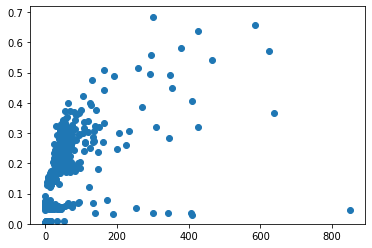

In [3]:
plt.scatter(allData["one"], allData["Close"])
plt.ylim(ymin=0)

(0.0, 0.7188899999999999)

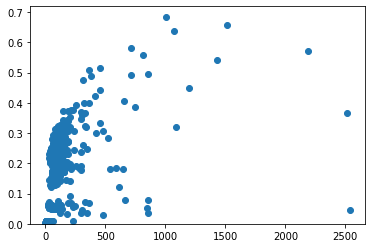

In [4]:
plt.scatter(allData["tweet_count"], allData["Close"])
plt.ylim(ymin=0)

(0.0, 0.7188899999999999)

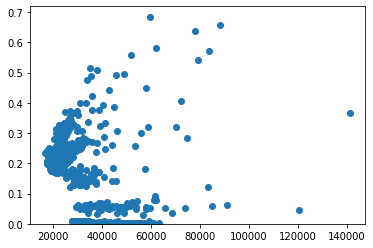

In [5]:
plt.scatter(allData["transaction_count"], allData["Close"])
plt.ylim(ymin=0)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
import statsmodels.api as sm

In [7]:
X = sm.add_constant(allData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends"]])
Y = allData["standardized_price"]
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     236.1
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.74e-119
Time:                        15:11:43   Log-Likelihood:                -536.23
No. Observations:                 576   AIC:                             1082.
Df Residuals:                     571   BIC:                             1104.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -4.77e-17    

(-1.80415951737405, 2.0)

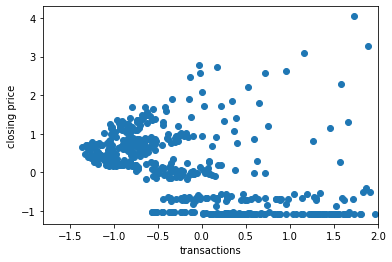

In [8]:
plt.scatter(allData["standardized_txs"], allData["standardized_price"])
plt.xlabel("transactions")
plt.ylabel("closing price")
plt.xlim(right=2)

(-1.0452200937494571, 2.0)

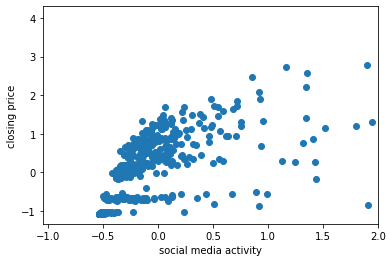

In [9]:
plt.scatter(allData["standardized_social"], allData["standardized_price"])
plt.xlabel("social media activity")
plt.ylabel("closing price")
plt.xlim(right=2)

In [10]:
allData["txnsSq"] = allData["standardized_txs"]*allData["standardized_txs"]
allData["smSq"] = allData["standardized_social"]*allData["standardized_social"]
allData["trendSq"] = allData["standardized_trends"]*allData["standardized_trends"]
allData["postsSq"] = allData["standardized_posts"]*allData["standardized_posts"]
allData["twtSq"] = allData["standardized_tweets"]*allData["standardized_tweets"]
XQuadratic = sm.add_constant(allData[["standardized_txs", "standardized_trends","txnsSq", "trendSq", "postsSq", "twtSq"]])

modelQuadratic = sm.OLS(Y, XQuadratic).fit()
print(modelQuadratic.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     184.3
Date:                Tue, 17 May 2022   Prob (F-statistic):          7.03e-130
Time:                        15:11:43   Log-Likelihood:                -506.35
No. Observations:                 576   AIC:                             1027.
Df Residuals:                     569   BIC:                             1057.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0233    

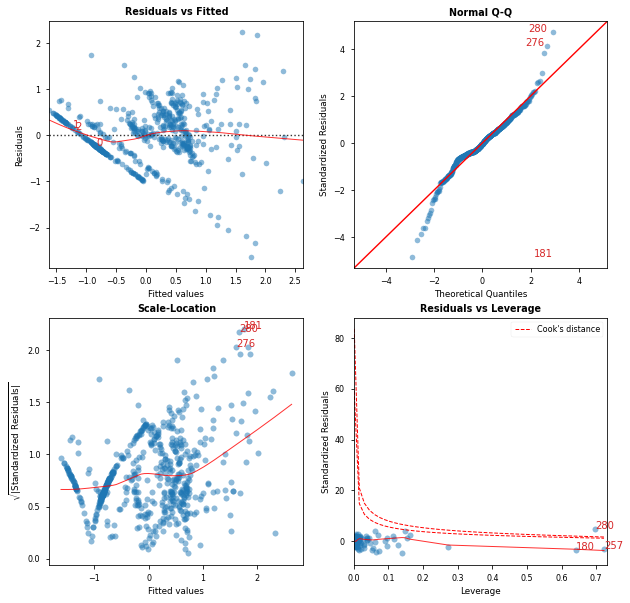

              Features  VIF Factor
0                const        1.43
1     standardized_txs        1.71
3               txnsSq        4.45
2  standardized_trends        4.93
5              postsSq        9.12
6                twtSq       34.39
4              trendSq       34.48


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [11]:
quadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadratic)
quadDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.648
Model:                                  OLS   Adj. R-squared:                  0.646
Method:                       Least Squares   F-statistic:                     263.1
Date:                      Tue, 17 May 2022   Prob (F-statistic):          5.19e-128
Time:                              15:11:45   Log-Likelihood:                -516.39
No. Observations:                       576   AIC:                             1043.
Df Residuals:                           571   BIC:                             1065.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

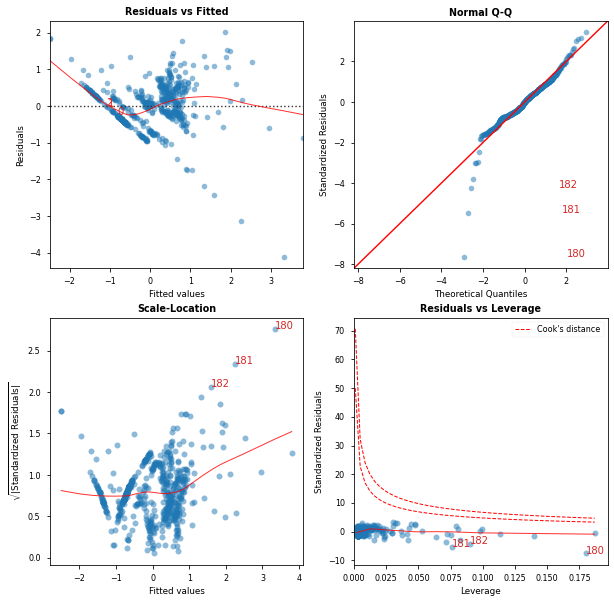

                    Features  VIF Factor
0                      const        1.00
1      standardized_smoothTx        1.39
2    standardized_smoothPost        8.87
3     standardized_smoothTwt       16.56
4  standardized_smoothTrends       20.95


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [12]:
allData["smoothedClosingPrice"] = allData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allData["smoothedTrends"] = allData["Dogecoin"].ewm(span=2).mean()
allData["smoothedPosts"] = allData["one"].ewm(span=2).mean()
allData["smoothedTxs"] = allData["transaction_count"].ewm(span=2).mean()
allData["smoothedTweets"] = allData["tweet_count"].ewm(span=2).mean()
allData[["standardized_smoothTx", "standardized_smoothTwt", "standardized_smoothPost", "standardized_smoothTrends"]] = prep.StandardScaler().fit_transform(allData[['smoothedTxs', 'smoothedTweets', 'smoothedPosts', "smoothedTrends"]])
allData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allData[["smoothedClosingPrice"]])
X = sm.add_constant(allData[["standardized_smoothTx", "standardized_smoothPost", "standardized_smoothTwt", "standardized_smoothTrends"]])
Y = allData["standardized_smoothPrice"]

modelSmoothed = sm.OLS(Y, X).fit()
print(modelSmoothed.summary())
smoothedDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelSmoothed)
smoothedDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.729
Model:                                  OLS   Adj. R-squared:                  0.725
Method:                       Least Squares   F-statistic:                     220.5
Date:                      Tue, 17 May 2022   Prob (F-statistic):          1.48e-168
Time:                              15:11:46   Log-Likelihood:                -441.09
No. Observations:                       576   AIC:                             900.2
Df Residuals:                           567   BIC:                             939.4
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

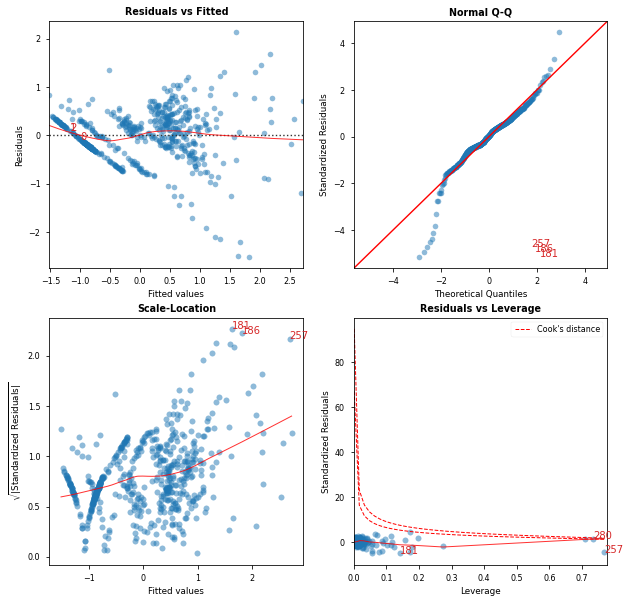

                Features  VIF Factor
0                  const        1.51
1       standardized_txs        2.02
5      standardized_txSq        4.74
2     standardized_posts       15.96
7   standardized_postsSq       17.77
3    standardized_tweets       32.00
4    standardized_trends       33.53
6   standardized_trendSq       55.60
8  standardized_tweetsSq       73.37


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [13]:
XQuad = sm.add_constant(allData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq", "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"]])
YSmooth = allData["standardized_smoothPrice"]
modelQuadSmoothed = sm.OLS(YSmooth, XQuad).fit(cov_type='HC3')
print(modelQuadSmoothed.summary())
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothed)
smoothedQuadDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.732
Model:                                  OLS   Adj. R-squared:                  0.728
Method:                       Least Squares   F-statistic:                     220.0
Date:                      Tue, 17 May 2022   Prob (F-statistic):          2.62e-164
Time:                              15:13:46   Log-Likelihood:                -430.42
No. Observations:                       548   AIC:                             878.8
Df Residuals:                           539   BIC:                             917.6
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

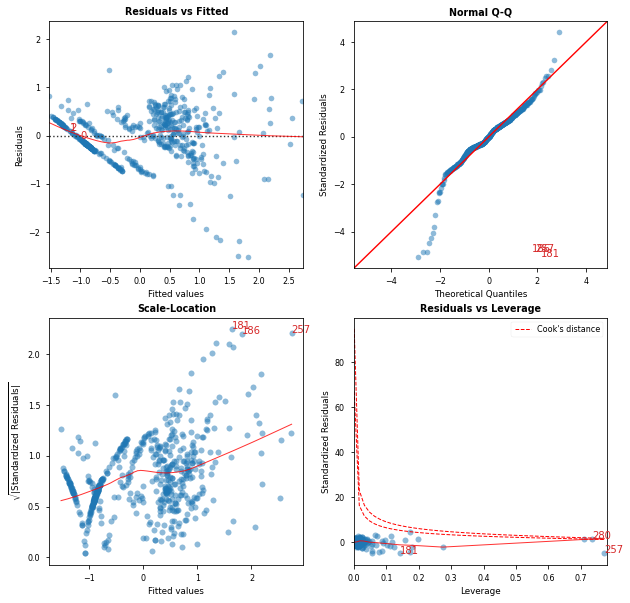

                Features  VIF Factor
0                  const        1.47
1       standardized_txs        2.03
5      standardized_txSq        4.73
2     standardized_posts       16.20
7   standardized_postsSq       18.01
3    standardized_tweets       32.41
4    standardized_trends       33.59
6   standardized_trendSq       55.83
8  standardized_tweetsSq       74.04
0.06068891323397176


In [26]:
YSmooth = allData["standardized_smoothPrice"]
modelQuadTrain = sm.OLS(YSmooth[0:548], XQuad[0:548]).fit(cov_type='HC3')
print(modelQuadTrain.summary())
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadTrain)
smoothedQuadDiagnostics()
XNewTest = XQuad[548:]
YPredTest = modelQuadTrain.predict(XNewTest)
YTestReal = YSmooth[548:]
print(stools.eval_measures.mse(YPredTest, YTestReal))

In [14]:
tranX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_trends", 
                                   "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_txs", "standardized_txSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTx = tranX
XQuadSmoothNoTx.index = idx

[[ 0.02315812  0.30890802 -0.55174842]
 [ 0.04313055  1.07150054 -0.52872059]
 [ 0.03986326  0.91530968 -0.55174842]
 ...
 [-0.02154677  0.26741573 -0.42509535]
 [-0.02639375  0.40125889 -0.40206752]
 [-0.02306951  0.30654849 -0.39055361]]
[[ 0.02315812 -0.01175479 -0.55174842]
 [ 0.04313055 -0.01436132 -0.52872059]
 [ 0.03986326 -0.0144121  -0.55174842]
 ...
 [-0.02154677  0.01935836 -0.42509535]
 [-0.02639375  0.02483152 -0.40206752]
 [-0.02306951  0.02103357 -0.39055361]]
[[ 0.02315812 -0.01175479 -0.03321421]
 [ 0.04313055 -0.01436132 -0.04032384]
 [ 0.03986326 -0.0144121  -0.039898  ]
 ...
 [-0.02154677  0.01935836 -0.02102556]
 [-0.02639375  0.02483152 -0.02029318]
 [-0.02306951  0.02103357 -0.01938594]]
[[ 0.02315812 -0.01175479 -0.03321421]
 [ 0.04313055 -0.01436132 -0.04032384]
 [ 0.03986326 -0.0144121  -0.039898  ]
 ...
 [-0.02154677  0.01935836 -0.02102556]
 [-0.02639375  0.02483152 -0.02029318]
 [-0.02306951  0.02103357 -0.01938594]]
[[ 0.02315812  0.30890802 -0.50504479]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.567
Model:                                  OLS   Adj. R-squared:                  0.562
Method:                       Least Squares   F-statistic:                     123.9
Date:                      Tue, 17 May 2022   Prob (F-statistic):          6.90e-100
Time:                              15:11:48   Log-Likelihood:                -576.57
No. Observations:                       576   AIC:                             1167.
Df Residuals:                           569   BIC:                             1198.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

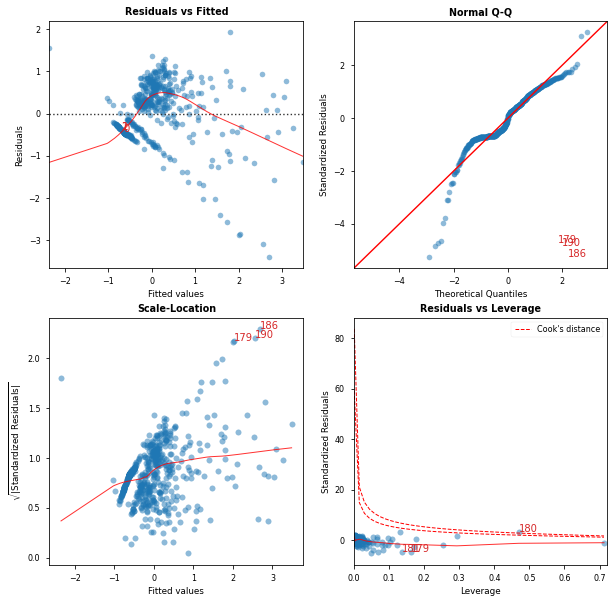

                Features  VIF Factor
0                  const        1.26
5   standardized_postsSq        6.86
1     standardized_posts       10.30
2    standardized_tweets       16.04
4   standardized_trendSq       17.30
3    standardized_trends       18.12
6  standardized_tweetsSq       19.30


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [15]:
modelQuadSmoothedNoTx = sm.OLS(YSmooth, XQuadSmoothNoTx).fit()
print(modelQuadSmoothedNoTx.summary())
smoothedQuadDiagnosticsNoTx = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTx)
smoothedQuadDiagnosticsNoTx()

In [16]:
trendX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_trends", "standardized_trendSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTrend = trendX
XQuadSmoothNoTrend.index = idx
Y = allData["standardized_price"]

[[-0.01630823  0.15319196 -0.55174842]
 [-0.02022248  0.23555449 -0.52872059]
 [-0.02022248  0.23555449 -0.55174842]
 ...
 [-0.01429179  0.11765108 -0.42509535]
 [-0.01429179  0.11765108 -0.40206752]
 [-0.01389641  0.11123154 -0.39055361]]
[[-0.01630823  0.02789034 -0.55174842]
 [-0.02022248  0.03515434 -0.52872059]
 [-0.02022248  0.03515434 -0.55174842]
 ...
 [-0.01429179  0.02423438 -0.42509535]
 [-0.01429179  0.02423438 -0.40206752]
 [-0.01389641  0.02352438 -0.39055361]]
[[-0.01630823  0.02789034 -0.01652516]
 [-0.02022248  0.03515434 -0.00281247]
 [-0.02022248  0.03515434 -0.00541667]
 ...
 [-0.01429179  0.02423438 -0.0079097 ]
 [-0.01429179  0.02423438 -0.0053055 ]
 [-0.01389641  0.02352438 -0.00512136]]
[[-0.01630823  0.02789034 -0.01652516]
 [-0.02022248  0.03515434 -0.00281247]
 [-0.02022248  0.03515434 -0.00541667]
 ...
 [-0.01429179  0.02423438 -0.0079097 ]
 [-0.01429179  0.02423438 -0.0053055 ]
 [-0.01389641  0.02352438 -0.00512136]]
[[-0.01630823  0.15319196 -0.50504479]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.389
Model:                                  OLS   Adj. R-squared:                  0.382
Method:                       Least Squares   F-statistic:                     60.27
Date:                      Tue, 17 May 2022   Prob (F-statistic):           1.02e-57
Time:                              15:11:49   Log-Likelihood:                -675.62
No. Observations:                       576   AIC:                             1365.
Df Residuals:                           569   BIC:                             1396.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

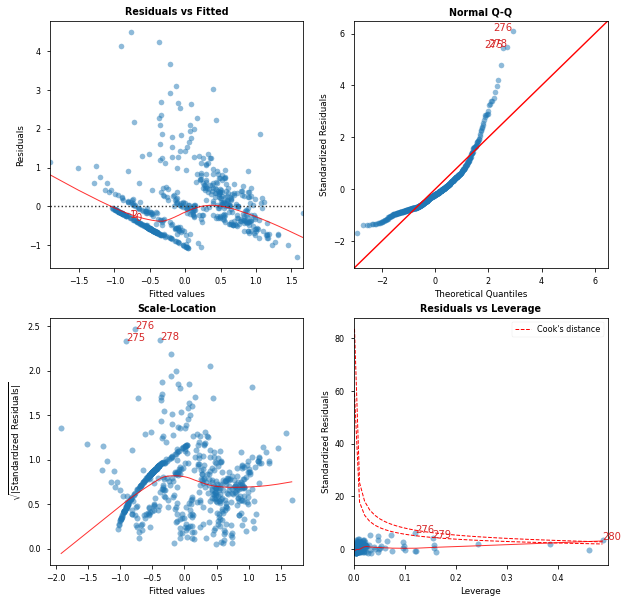

                Features  VIF Factor
0                  const        1.33
4       standardized_txs        1.39
3      standardized_txSq        1.44
1     standardized_posts        2.15
5   standardized_postsSq        2.24
2    standardized_tweets        2.41
6  standardized_tweetsSq        2.86


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [17]:
modelQuadSmoothedNoTrend = sm.OLS(YSmooth, XQuadSmoothNoTrend).fit()
print(modelQuadSmoothedNoTrend.summary())
smoothedQuadDiagnosticsNoTrend = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTrend)
smoothedQuadDiagnosticsNoTrend()

In [18]:
postX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_tweetsSq"], 
                                   ["standardized_posts", "standardized_postsSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoPost = postX
XQuadSmoothNoPost.index = idx

[[-0.02298952  0.30442632 -0.39139745]
 [-0.02203002  0.27954546 -0.48533956]
 [-0.02298952  0.30442632 -0.48533956]
 ...
 [-0.01771231  0.18070606 -0.34300303]
 [-0.01675281  0.16165829 -0.34300303]
 [-0.01627307  0.15253212 -0.33351393]]
[[-0.02298952  0.03803961 -0.39139745]
 [-0.02203002  0.03628185 -0.48533956]
 [-0.02298952  0.03803961 -0.48533956]
 ...
 [-0.01771231  0.02855535 -0.34300303]
 [-0.01675281  0.0268791  -0.34300303]
 [-0.01627307  0.02604654 -0.33351393]]
[[-0.02298952  0.03803961  0.00137343]
 [-0.02203002  0.03628185 -0.01159006]
 [-0.02298952  0.03803961 -0.00966961]
 ...
 [-0.01771231  0.02855535 -0.00356179]
 [-0.01675281  0.0268791  -0.00550961]
 [-0.01627307  0.02604654 -0.00536993]]
[[-0.02298952  0.03803961  0.00137343]
 [-0.02203002  0.03628185 -0.01159006]
 [-0.02298952  0.03803961 -0.00966961]
 ...
 [-0.01771231  0.02855535 -0.00356179]
 [-0.01675281  0.0268791  -0.00550961]
 [-0.01627307  0.02604654 -0.00536993]]
[[-0.02298952  0.30442632 -0.50504479]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.246
Model:                                  OLS   Adj. R-squared:                  0.238
Method:                       Least Squares   F-statistic:                     30.95
Date:                      Tue, 17 May 2022   Prob (F-statistic):           3.21e-32
Time:                              15:11:50   Log-Likelihood:                -735.97
No. Observations:                       576   AIC:                             1486.
Df Residuals:                           569   BIC:                             1516.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

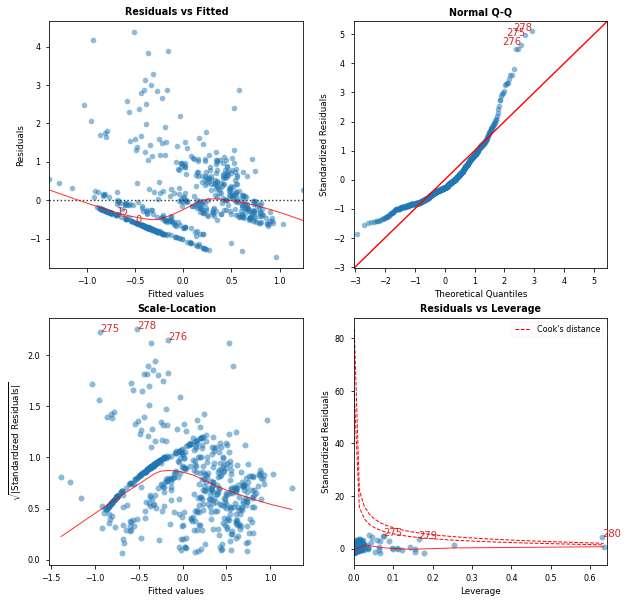

                Features  VIF Factor
0                  const        1.29
4       standardized_txs        1.35
3      standardized_txSq        1.83
1    standardized_trends        4.15
2    standardized_tweets        4.45
5   standardized_trendSq        7.56
6  standardized_tweetsSq        9.77


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [19]:
modelQuadSmoothedNoPost = sm.OLS(YSmooth, XQuadSmoothNoPost).fit()
print(modelQuadSmoothedNoPost.summary())
smoothedQuadDiagnosticsNoPost = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoPost)
smoothedQuadDiagnosticsNoPost()

In [20]:
twtX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_posts", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_postsSq"], 
                                   ["standardized_tweets", "standardized_tweetsSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTwt = twtX
XQuadSmoothNoTwt.index = idx

[[-0.02104353  0.25507024 -0.39139745]
 [-0.02069831  0.24676998 -0.48533956]
 [-0.02087092  0.25090295 -0.48533956]
 ...
 [-0.0141391   0.11515057 -0.34300303]
 [-0.01327605  0.10152198 -0.34300303]
 [-0.01120472  0.07231433 -0.33351393]]
[[-0.02104353  0.03667108 -0.39139745]
 [-0.02069831  0.03602338 -0.48533956]
 [-0.02087092  0.03634704 -0.48533956]
 ...
 [-0.0141391   0.02400929 -0.34300303]
 [-0.01327605  0.02246983 -0.34300303]
 [-0.01120472  0.01881433 -0.33351393]]
[[-0.02104353  0.03667108  0.0176041 ]
 [-0.02069831  0.03602338  0.00273691]
 [-0.02087092  0.03634704  0.00335012]
 ...
 [-0.0141391   0.02400929  0.00013575]
 [-0.01327605  0.02246983 -0.00292118]
 [-0.01120472  0.01881433 -0.00887546]]
[[-0.02104353  0.03667108  0.0176041 ]
 [-0.02069831  0.03602338  0.00273691]
 [-0.02087092  0.03634704  0.00335012]
 ...
 [-0.0141391   0.02400929  0.00013575]
 [-0.01327605  0.02246983 -0.00292118]
 [-0.01120472  0.01881433 -0.00887546]]
[[-0.02104353  0.25507024 -0.55174842]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.311
Model:                                  OLS   Adj. R-squared:                  0.304
Method:                       Least Squares   F-statistic:                     42.86
Date:                      Tue, 17 May 2022   Prob (F-statistic):           3.40e-43
Time:                              15:11:52   Log-Likelihood:                -709.92
No. Observations:                       576   AIC:                             1434.
Df Residuals:                           569   BIC:                             1464.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

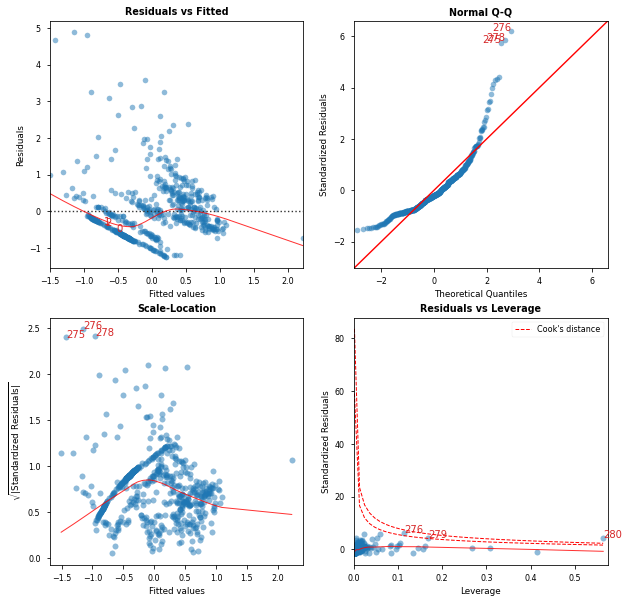

               Features  VIF Factor
3     standardized_txSq        1.24
0                 const        1.36
4      standardized_txs        1.44
6  standardized_postsSq        2.25
5  standardized_trendSq        2.28
2    standardized_posts        2.49
1   standardized_trends        2.75


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [21]:
modelQuadSmoothedNoTwt = sm.OLS(YSmooth, XQuadSmoothNoTwt).fit()
print(modelQuadSmoothedNoTwt.summary())
smoothedQuadDiagnosticsNoTwt = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTwt)
smoothedQuadDiagnosticsNoTwt()

In [22]:
influence = modelQuadSmoothed.get_influence()
inf_sum = influence.summary_frame()
inf_sum
xQuadLowLeverage = XQuadSmooth[np.abs(inf_sum["hat_diag"]) > (20/576)]
xQuadNoOutliers = xQuadLowLeverage[np.abs(inf_sum["student_resid"]) > 2.5]
xQuadRemoveBad = XQuadSmooth.loc[set(XQuadSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
YSmoothRemoveBad = YSmooth.loc[set(YSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
modelQuadSmoothedNoOutliers = sm.OLS(YSmoothRemoveBad, xQuadRemoveBad).fit(cov_type='HC3')
print(modelQuadSmoothedNoOutliers.summary())
noOutliersDiag = Linear_Reg_Diagnostic(modelQuadSmoothedNoOutliers)
noOutliersDiag()

NameError: name 'XQuadSmooth' is not defined

In [ ]:
XOutlierSmoothNoTx = sm.add_constant(xQuadRemoveBad[["standardized_smoothPost", "standardized_smoothTwt", "standardized_smoothTrends", "smoothTrendSq", "smoothPostsSq", "smoothTwtSq"]])
modelOutlierSmoothedNoTx = sm.OLS(YSmoothRemoveBad, XOutlierSmoothNoTx).fit()
print(modelOutlierSmoothedNoTx.summary())
smoothedOutlierDiagnosticsNoTx = Linear_Reg_Diagnostic(modelOutlierSmoothedNoTx)
smoothedOutlierDiagnosticsNoTx()